<a href="https://colab.research.google.com/github/data-with-shobhit/Regression---Bike-Sharing-Demand-Prediction/blob/main/Regression_Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **GitHub Link -**

https://github.com/data-with-shobhit/Regression---Bike-Sharing-Demand-Prediction.git

# **Problem Statement**


Bike-sharing programs have become increasingly popular as an eco-friendly and convenient mode of transportation in urban areas. Accurately predicting bike demand is crucial for effective resource management, operational efficiency, and improving customer satisfaction. The goal of this project is to develop a predictive model that forecasts bike demand based on various factors such as weather conditions, time of day, and special events.

The specific problem is to predict the number of bikes rented per hour at a bike-sharing station. The dataset provided includes historical records of bike rentals, along with relevant features such as temperature, humidity, wind speed, and time-related variables. By building a regression model, we aim to accurately estimate the demand for bikes at different times of the day and under various weather conditions. This will enable bike-sharing operators to optimize bike availability, reduce operational costs, and enhance the overall user experience.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Load Dataset
data=pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv',encoding = "unicode_escape")

### Dataset First View

In [3]:
# Dataset First Look
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
data.shape

(8760, 14)

### Dataset Information

In [5]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
data.isnull().sum()

,0
Date,0
Rented Bike Count,0
Hour,0
Temperature(°C),0
Humidity(%),0
Wind speed (m/s),0
Visibility (10m),0
Dew point temperature(°C),0
Solar Radiation (MJ/m2),0
Rainfall(mm),0


### What did you know about your dataset?

- The dataset contains 8760 rows and 14 columns. There are no missing or null values in the dataset. There are no duplicate values present in the dataset.
- The dataset contains information about bike rentals in Seoul, including date, time, weather conditions, and the number of bikes rented. The 'Date' column is of object type and needs to be converted to datetime.
- The 'Functioning Day' column has two unique values 'Yes' and 'No', indicating whether the bike rental service was functional on that day.
- The 'Holiday' column indicates whether the day was a holiday or not.
- The 'Seasons' column has four unique values representing the four seasons.
- The remaining columns contain numerical data representing weather conditions and the number of bikes rented.

## ***2. Understanding Your Variables***

In [8]:
# Dataset Columns
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [9]:
# Dataset Describe
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### Variables Description

- Date : year-month-day
- Rented Bike count - Count of bikes rented at each hour
- Hour - Hour of he day
- Temperature-Temperature in Celsius
- Humidity - %
- Windspeed - m/s
- Visibility - 10m
- Dew point temperature - Celsius
- Solar radiation - MJ/m2
- Rainfall - mm
- Seasons - Winter, Spring, Summer, Autumn
- Holiday - Holiday/No holiday
- Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### Check Unique Values for each variable.

In [10]:
# Check Unique Values for each variable.
for i in data.columns:
  print(f"Unique values in {i} is {data[i].unique()}")
  print()

Unique values in Date is ['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'
 '09/02/2018' '10/02/2018' '11/02/2018' '12/02/2018

## 3. ***Data Wrangling***

### Data Wrangling Code

In [11]:
# need to convert date into datetime
data["Date"] = pd.to_datetime(data["Date"], format="%d/%m/%Y")

In [12]:
# let convert date into day,month and year individual columns in dataset

data["year"] = data["Date"].dt.year
data["month"] = data["Date"].dt.month
data["day"] = data["Date"].dt.day
data["weekday"] = data["Date"].dt.day_name()

In [13]:
data.head(2)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day,weekday
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,Friday


In [14]:
data.drop(columns="Date", axis =1,inplace =True)

In [15]:
# All Numeric Variable
numerical_var = [var for var in data.columns if data[var].dtype != "O" ]
numerical_var

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'year',
 'month',
 'day']

In [16]:
# All Discrete Variables
discrete_var = [var for var in numerical_var if len(data[var].unique()) < 25]
discrete_var

['Hour', 'year', 'month']

In [17]:
# Categorical Variables
categorical_var = [var for var in data.columns if var not in numerical_var ]
categorical_var

['Seasons', 'Holiday', 'Functioning Day', 'weekday']

### What all manipulations have you done and insights you found?

Data wrangling performed:
1. Converted the 'Date' column to datetime format.
2. Extracted year, month, day, and weekday from the 'Date' column.
3. Dropped the original 'Date' column.
4. Identified numerical, discrete, and categorical variables.

Insights:
- The dataset now has separate columns for year, month, day, and weekday, enabling more granular analysis based on time.
- The identification of different variable types will aid in choosing appropriate visualization and modeling techniques.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

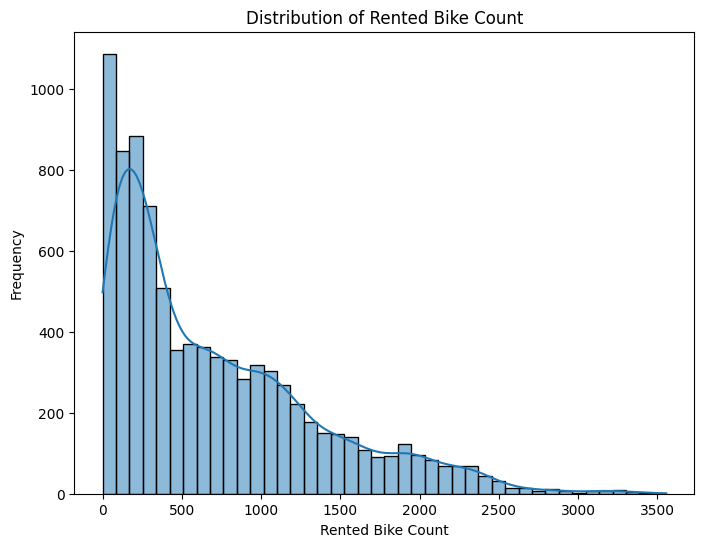

In [18]:
plt.figure(figsize=(8,6))
sns.histplot(data=data,x='Rented Bike Count',kde=True)
plt.title("Distribution of Rented Bike Count")
plt.xlabel("Rented Bike Count")
plt.ylabel("Frequency")
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is a suitable choice for visualizing the distribution of a single numerical variable, in this case, the 'Rented Bike Count'. It shows the frequency of different bike rental counts, providing insights into the overall demand pattern.

##### 2. What is/are the insight(s) found from the chart?

The histogram reveals that the distribution of rented bike counts is right-skewed, with a majority of rentals falling in the lower range and a long tail of higher counts. This suggests that most of the time, the demand for bikes is relatively low, but there are occasional spikes in demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Yes, understanding the distribution of bike rentals can help bike-sharing operators optimize their inventory management. They can ensure sufficient bikes are available during peak demand periods, while avoiding overstocking during low-demand times.
- The right-skewness of the distribution indicates that there might be periods of underutilized bikes. This could lead to increased operational costs due to maintenance and storage of unused bikes. Addressing this issue could involve strategies to incentivize bike rentals during off-peak hours or adjusting the bike fleet size based on demand patterns.

#### Chart - 2

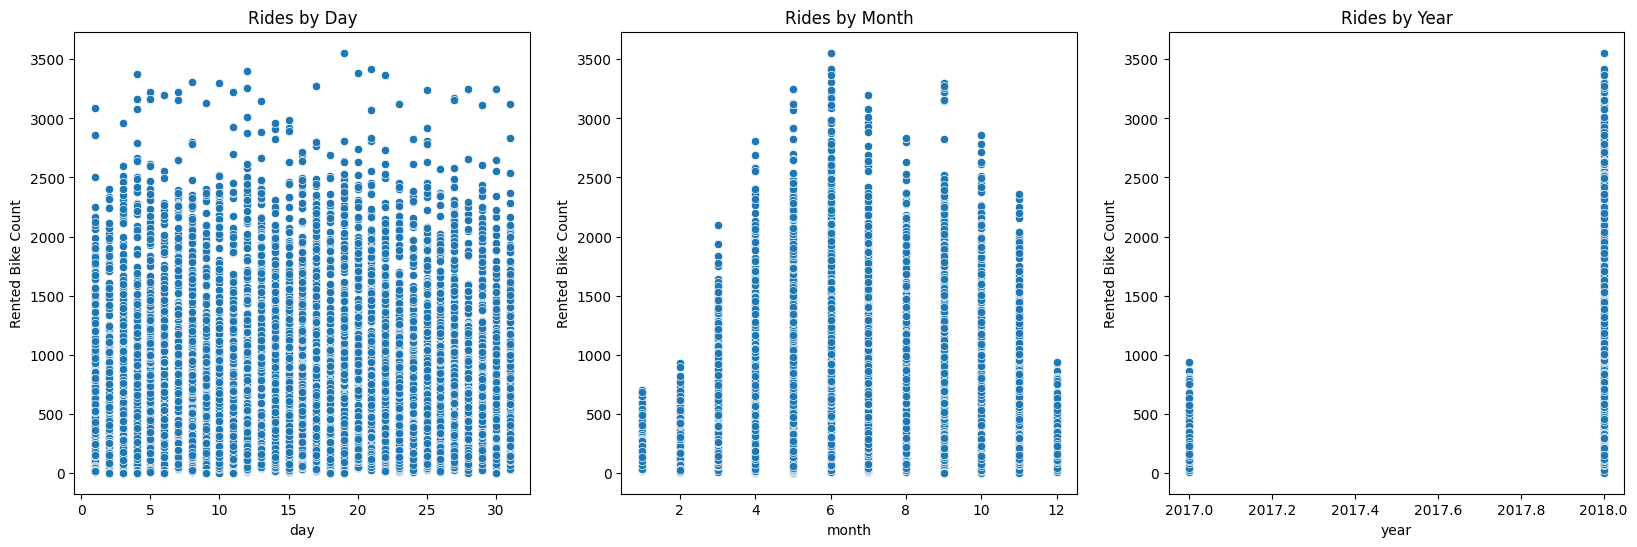

In [19]:
# Chart - 2 - Rides count by day, month, year

fig, ax = plt.subplots(1, 3, figsize=(20, 6))

# Rides by Day
sns.scatterplot(data=data, x='day', y='Rented Bike Count', ax=ax[0])
ax[0].set_title('Rides by Day')

# Rides by Month
sns.scatterplot(data=data, x='month', y='Rented Bike Count', ax=ax[1])
ax[1].set_title('Rides by Month')

# Rides by Year
sns.scatterplot(data=data, x='year', y='Rented Bike Count', ax=ax[2])
ax[2].set_title('Rides by Year')

plt.show()



##### 1. Why did you pick the specific chart?

Scatterplots are useful for visualizing the relationship between two numerical variables. In this case, we want to see how the number of rented bikes varies with the day, month, and year.

##### 2. What is/are the insight(s) found from the chart?

- There is no clear trend in rides by day.
- Rides tend to be higher in the middle months of the year (summer).
- The data is only for one year, so we can't draw conclusions about trends across years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding the seasonal trends in bike rentals can help the business optimize inventory and pricing. For example, they might offer discounts during the off-season or increase the number of bikes available during peak season.

#### Chart - 3

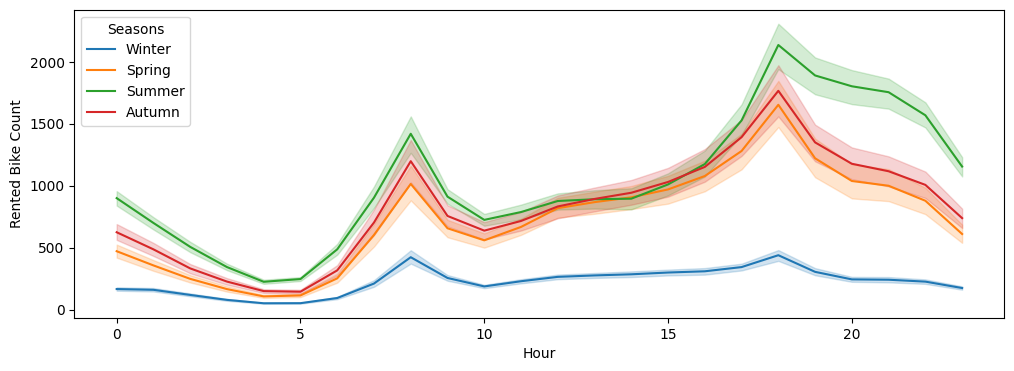

In [20]:
# Chart - 3 -Rented Bike Count By Hours during different seasons
plt.figure(figsize=(12,4))
graph = sns.lineplot(data=data, x="Hour", y="Rented Bike Count", hue="Seasons")

##### 1. Why did you pick the specific chart?

A line plot is a suitable choice for visualizing the trend of bike rentals over time (hours) and how it varies across different seasons. It allows us to observe the peak rental hours and seasonal patterns.

##### 2. What is/are the insight(s) found from the chart?

The line plot shows that bike rentals peak during commuting hours (8-9 AM and 5-7 PM) across all seasons.
During summer, rentals are generally higher throughout the day compared to other seasons.
Winter shows the lowest demand for bike rentals.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can help optimize bike availability during peak hours and across different seasons.
The business can focus on increasing bike supply during commuting hours and in summer to meet higher demand.
Conversely, they can reduce the fleet size during winter months to minimize costs.

#### Chart - 4

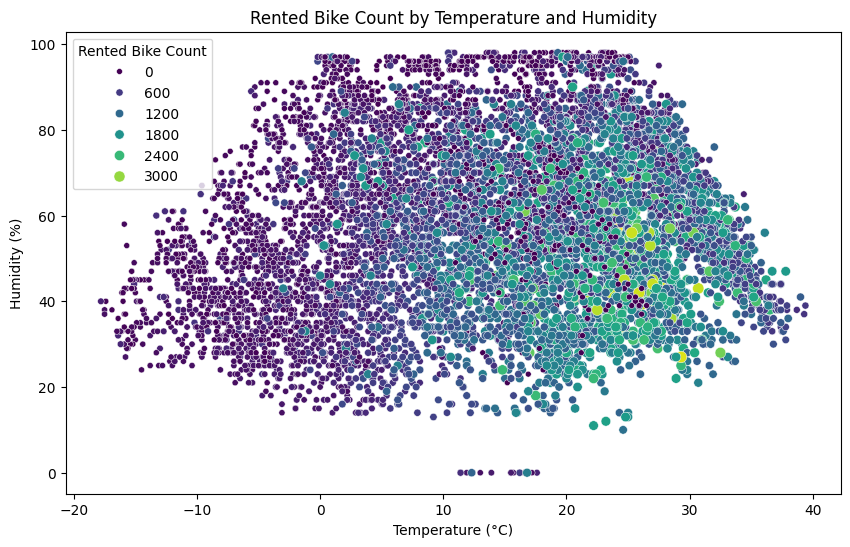

In [21]:
# Chart - 4 - Rented bike count by temperature and humidity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Temperature(°C)', y='Humidity(%)', size='Rented Bike Count', hue='Rented Bike Count', palette='viridis')
plt.title('Rented Bike Count by Temperature and Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot with size and hue encoding is chosen to visualize the relationship between temperature, humidity, and rented bike count. It allows us to see how bike rentals vary with these two weather conditions simultaneously.

##### 2. What is/are the insight(s) found from the chart?

- The scatter plot indicates that bike rentals tend to be higher at moderate temperatures and lower humidity levels.
- There seems to be a positive correlation between temperature and bike rentals up to a certain point, beyond which rentals might decrease due to extreme heat.
- Similarly, higher humidity seems to negatively impact bike rentals.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Are there any insights that lead to negative growth? Justify with specific reason.
- Yes, these insights can help the business anticipate demand based on weather forecasts.
- They can increase bike availability during pleasant weather conditions and potentially offer discounts or promotions during less favorable weather to encourage rentals.
- However, extreme weather conditions (very high temperatures or high humidity) could lead to decreased demand, and the business needs to be prepared for such scenarios by adjusting their operational strategies.

#### Chart - 5

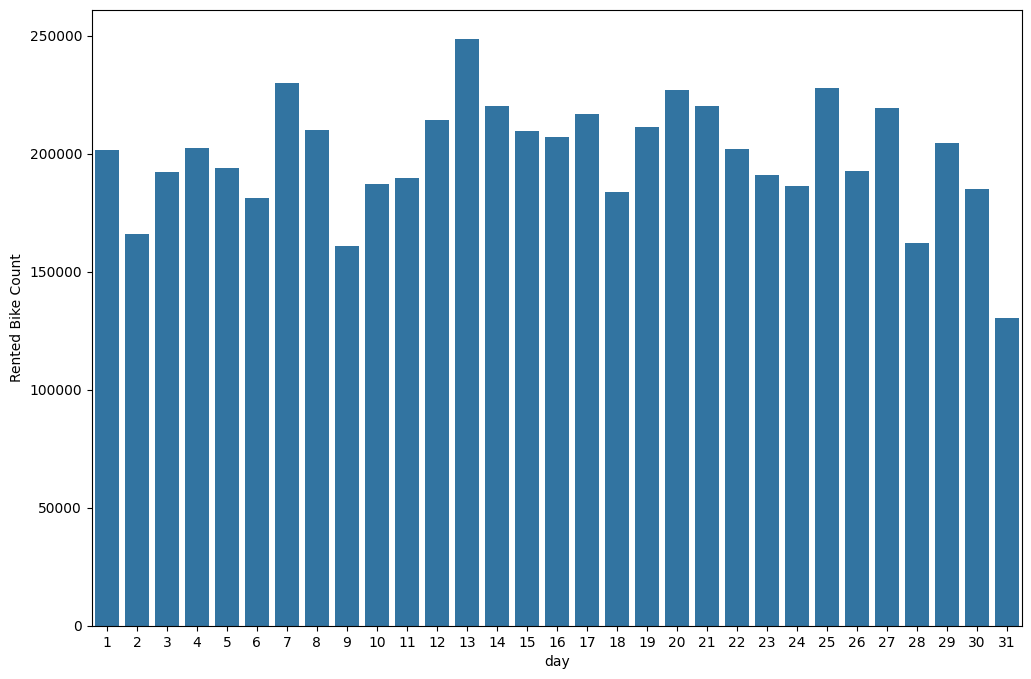

In [22]:
# Sum of Rented Bikes per day
days = data.groupby("day").sum().reset_index()
plt.figure(figsize = (12,8))
sns.barplot(x = "day", y = "Rented Bike Count",data= days )
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is used to display the total number of bikes rented each day. This allows for easy comparison of bike rental activity across different days of the month.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that bike rentals tend to be higher in the middle of the month and lower at the beginning and end of the month. This could be due to a variety of factors, such as paydays or people being more likely to take vacations at the beginning and end of the month.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can help the business optimize inventory and staffing levels. For example, they might increase the number of bikes available in the middle of the month and reduce staffing levels at the beginning and end of the month. There are no insights that suggest negative growth.

#### Chart - 6

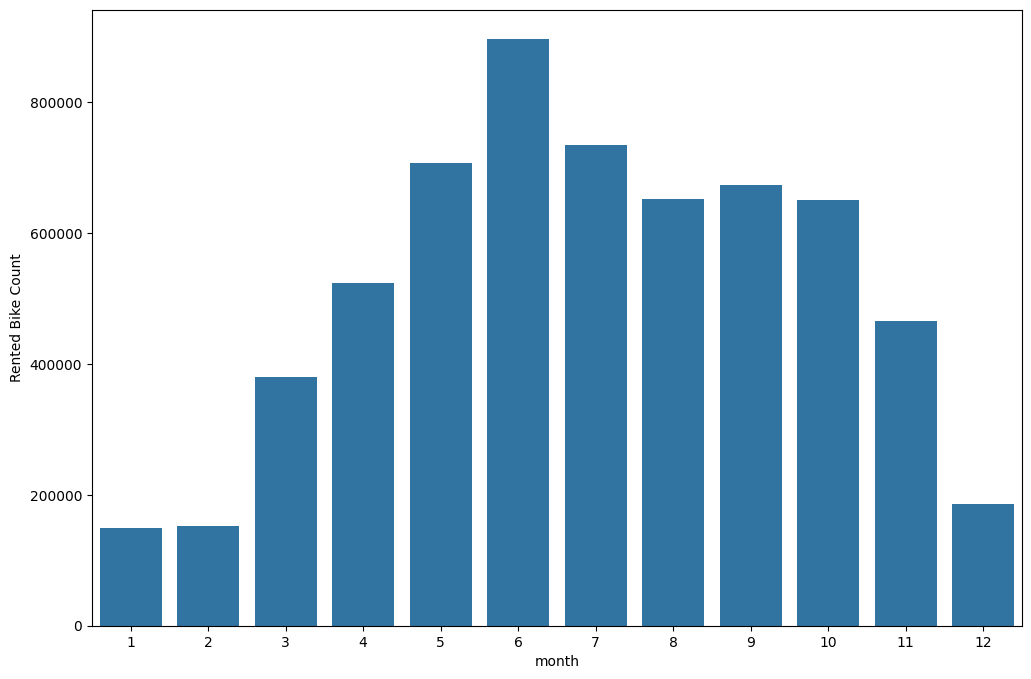

In [23]:
months = data.groupby("month").sum().reset_index()
plt.figure(figsize = (12,8))
sns.barplot(x = "month", y = "Rented Bike Count",data= months )
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7 - Correlation Heatmap

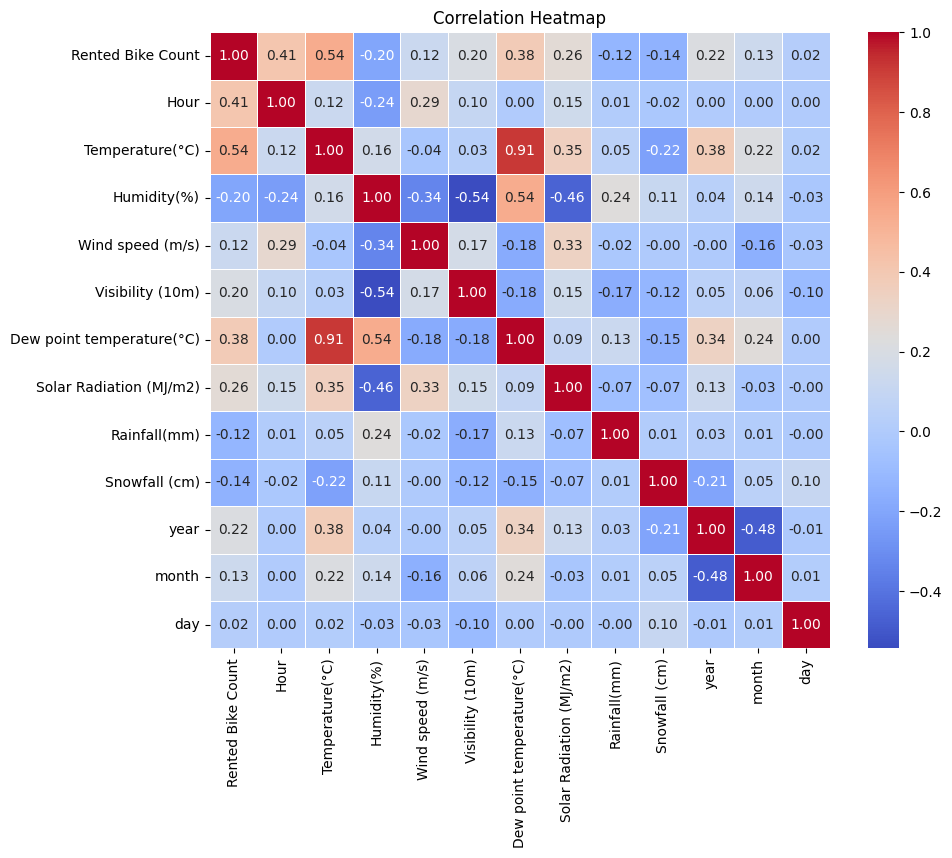

In [24]:
# Correlation Heatmap visualization code
# Select only the numeric columns (excluding object types)
numeric_data = data.select_dtypes(exclude=['object'])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap is a graphical representation of data where the individual values contained in a matrix are represented as colors. This is a suitable choice to visualize the correlation matrix as it allows us to quickly identify patterns and relationships between multiple numerical variables.

##### 2. What is/are the insight(s) found from the chart?

- The heatmap shows a strong positive correlation between temperature and rented bike count, indicating that as temperature increases, the number of bikes rented also tends to increase.
- There is also a negative correlation between humidity and rented bike count, suggesting that people are less likely to rent bikes when it is humid.
- Dew point temperature and temperature are highly correlated, which is expected as dew point is directly related to temperature and humidity.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [25]:
df=data.copy()

In [27]:
df.isnull().sum()

,0
Rented Bike Count,0
Hour,0
Temperature(°C),0
Humidity(%),0
Wind speed (m/s),0
Visibility (10m),0
Dew point temperature(°C),0
Solar Radiation (MJ/m2),0
Rainfall(mm),0
Snowfall (cm),0


### 2. Handling Outliers

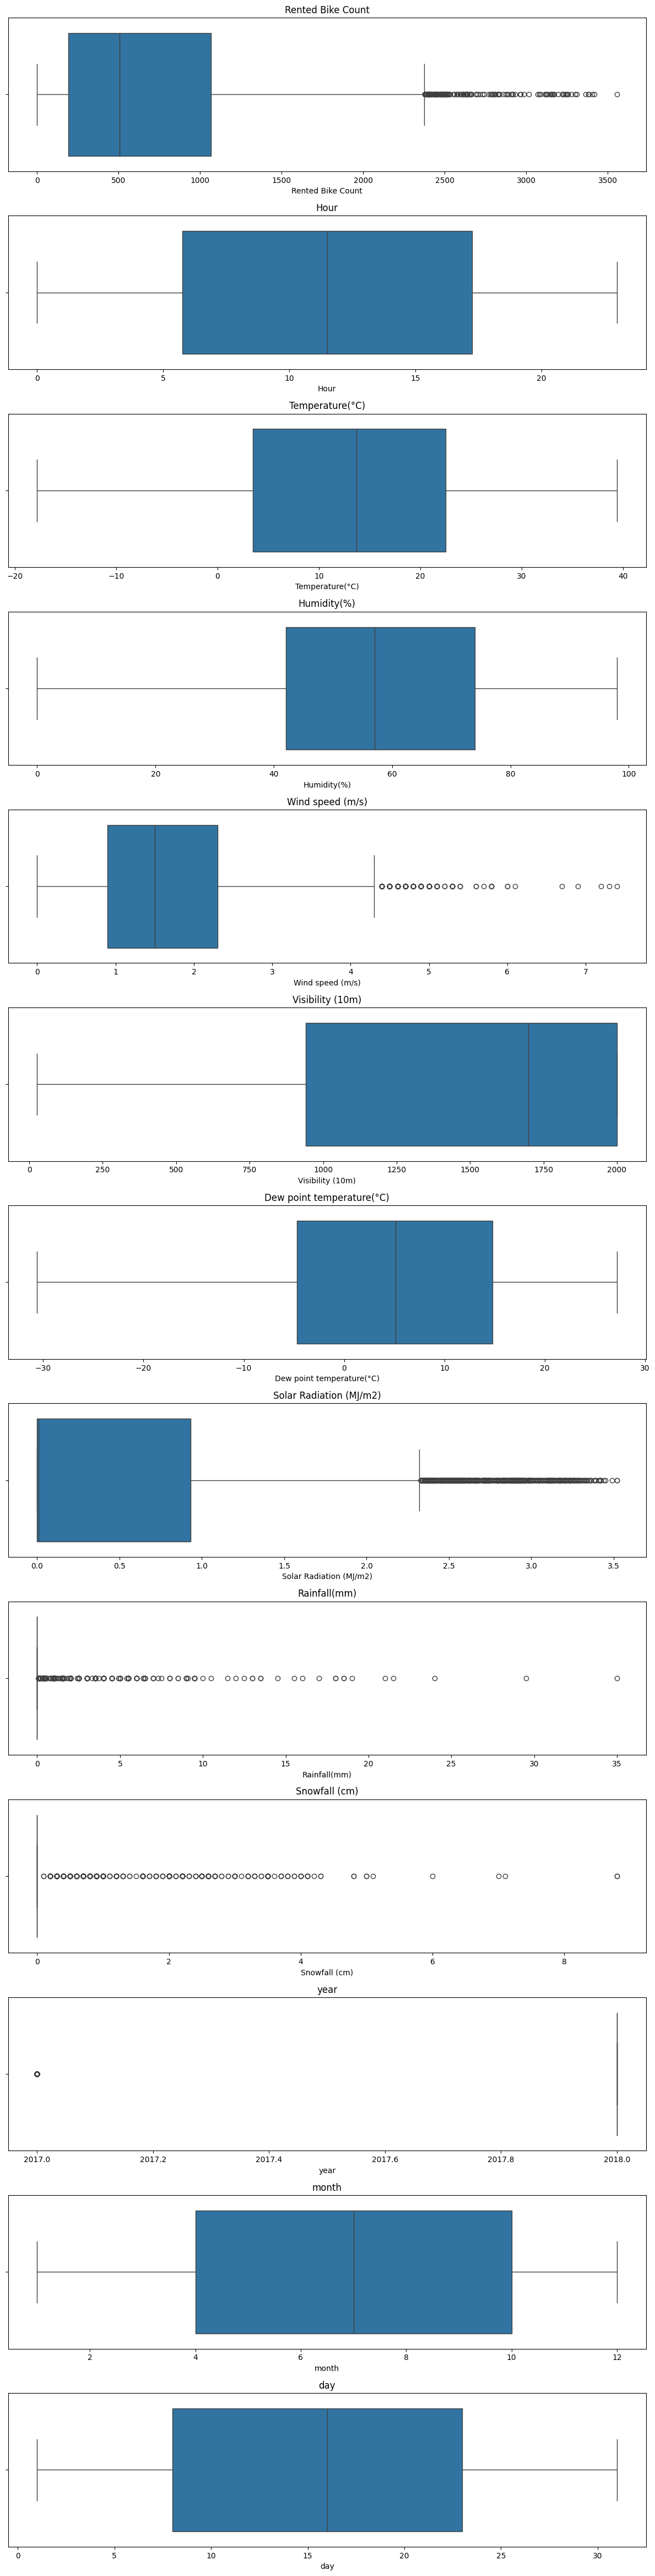

In [28]:
plt.figure(figsize = (12,50))
counter = 1
for var in numerical_var:
    if counter < 20:
        plt.subplot(14,1,counter)
        sns.boxplot(x = var, orient = "h", data =df)
        plt.title(var)
    counter += 1
plt.tight_layout()

In [29]:
# Handling Outliers & Outlier treatments
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables =  df[numerical_var]
variables.drop(columns = "Dew point temperature(°C)",index =1,inplace =True)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values,i)for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [30]:
vif

,VIF,features
0,4.154667,Rented Bike Count
1,5.056280,Hour
2,5.012922,Temperature(°C)
3,25.008605,Humidity(%)
4,4.884438,Wind speed (m/s)
5,10.722689,Visibility (10m)
6,2.798850,Solar Radiation (MJ/m2)
7,1.109987,Rainfall(mm)
8,1.150496,Snowfall (cm)
9,64.224811,year


In [31]:
df.drop(columns = "Dew point temperature(°C)", axis = 1 ,inplace = True)

### 3. Categorical Encoding

In [32]:
# Mapping 'Holiday' column: 'Holiday' -> 0, 'No Holiday' -> 1
df.Holiday = df.Holiday.map({"Holiday": 0, "No Holiday": 1})

# Mapping 'Functioning Day' column: 'Yes' -> 1, 'No' -> 0
df['Functioning Day'] = df['Functioning Day'].map({"Yes": 1, "No": 0})


In [33]:
# one-hot encoding
df_seasons  = pd.get_dummies(df["Seasons"],drop_first = True).astype(int)
df_weekday  = pd.get_dummies(df["weekday"],drop_first = True).astype(int)
df = pd.concat([df, df_seasons, df_weekday], axis=1)

In [34]:
df.drop(columns = ["Seasons","weekday"],axis =1,inplace = True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Two categorical encoding techniques were used:

1. Mapping:
   - 'Holiday' and 'Functioning Day' columns were mapped to numerical values (0 and 1).
   - This technique is used for binary categorical variables where the order doesn't matter.
   - It simplifies the data representation for these variables, making them suitable for modeling.

2. One-Hot Encoding:
   - 'Seasons' and 'weekday' columns were one-hot encoded.
   - This technique is used for nominal categorical variables with multiple categories where no ordinal relationship exists.
   - It creates dummy variables for each category, preventing the model from misinterpreting any ordinal relationship between the categories.

### 4. Data Transformation

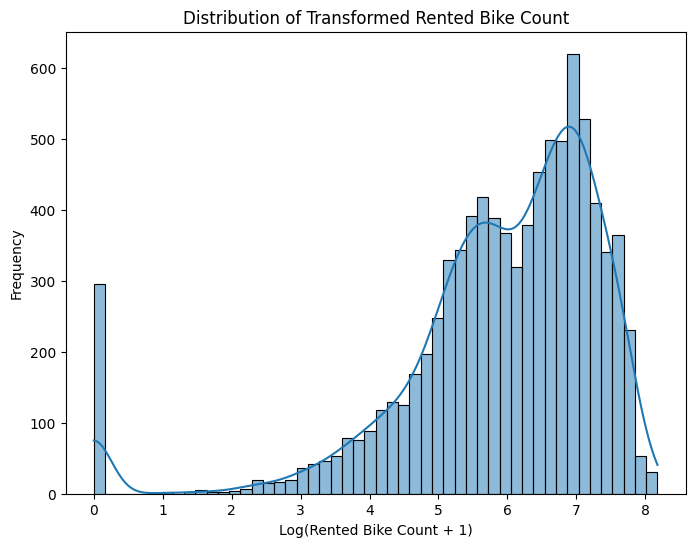

In [35]:
df['Rented Bike Count'] = np.log1p(df['Rented Bike Count'])

# Visualize the distribution of the transformed target variable
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Rented Bike Count', kde=True)
plt.title("Distribution of Transformed Rented Bike Count")
plt.xlabel("Log(Rented Bike Count + 1)")
plt.ylabel("Frequency")
plt.show()

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, the target variable 'Rented Bike Count' was transformed using a logarithmic transformation (np.log1p).

Explanation:

- The original distribution of 'Rented Bike Count' was right-skewed, which can cause issues for some machine learning algorithms that assume a normal distribution.

- Applying a logarithmic transformation helps to normalize the distribution, reducing the impact of extreme values and making the data more suitable for modeling.

- The 'np.log1p' function is used instead of a simple logarithm to handle zero values, as log(0) is undefined.

### 5. Data Scaling

In [36]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
X = df.drop(columns = "Rented Bike Count", axis = 1)
y = df["Rented Bike Count"]
sc = StandardScaler()
sc.fit(X)
X_scaled = sc.transform(X)
X_scaled

array([[-1.66132477, -1.51395724, -1.04248288, ..., -0.40759561,
        -0.40759561, -0.40759561],
       [-1.51686175, -1.53907415, -0.99336999, ..., -0.40759561,
        -0.40759561, -0.40759561],
       [-1.37239873, -1.58093567, -0.94425709, ..., -0.40759561,
        -0.40759561, -0.40759561],
       ...,
       [ 1.37239873, -0.86091752, -0.94425709, ..., -0.40759561,
        -0.40759561, -0.40759561],
       [ 1.51686175, -0.90277904, -0.8460313 , ..., -0.40759561,
        -0.40759561, -0.40759561],
       [ 1.66132477, -0.91952365, -0.74780551, ..., -0.40759561,
        -0.40759561, -0.40759561]])

##### Which method have you used to scale you data and why?

The StandardScaler method was used to scale the data.

Explanation:

- StandardScaler standardizes the features by subtracting the mean and scaling to unit variance.
- This ensures that all features have a similar scale, which can improve the performance of many machine learning algorithms, especially those that are sensitive to feature scaling, such as linear regression, logistic regression, and support vector machines.
- It helps in faster convergence of optimization algorithms and prevents features with larger ranges from dominating those with smaller ranges.

### 6. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No, dimensionality reduction is not strictly needed in this case.

Here's why:

1. Number of Features: We don't have an excessively large number of features to warrant dimensionality reduction techniques like PCA.

2. Interpretability:  Dimensionality reduction often leads to less interpretable features. In this dataset, understanding the impact of individual features like temperature, humidity, etc. on bike rentals is valuable.

3. Potential Information Loss:  Dimensionality reduction can lead to some loss of information, which might be undesirable in this predictive modeling task.

However, if we encounter issues like overfitting or computational constraints due to the number of features in the future, exploring dimensionality reduction could be a viable option.


### 7. Data Splitting

In [37]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size =0.2 , random_state = 42)

##### What data splitting ratio have you used and why?

We have used 80:20 split which is a standard practice in machine learning.
This ratio provides a good balance between having enough data to train the model effectively
(80% for training) and having a sufficient amount of data to evaluate its performance on unseen data (20% for testing).

### 8. Handling Imbalanced Dataset

No, the data is slightly imbalance but not that severe

## ***7. ML Model Implementation***

Model Evaluation

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
def get_metrics(y_test,y_pred,model_name):
    MSE = mean_squared_error(y_test, y_pred)
    RMSE= np.sqrt(MSE)
    MAE = mean_absolute_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)
    print( f' {model_name}:  [MSE : {MSE}, RMSE : {RMSE} , MAE: {MAE}, R2 : {R2}]')

### ML Model - 1

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression
LinearRegression()
y_pred = lr.predict(X_test)
y_pred

array([6.52666276, 7.19006787, 7.37109607, ..., 6.29110324, 4.44261256,
       7.32446796])

In [40]:
get_metrics(y_test, y_pred, "LinearRegression")

 LinearRegression:  [MSE : 0.5147205098207417, RMSE : 0.717440248258168 , MAE: 0.5177757459871175, R2 : 0.7875832829315446]


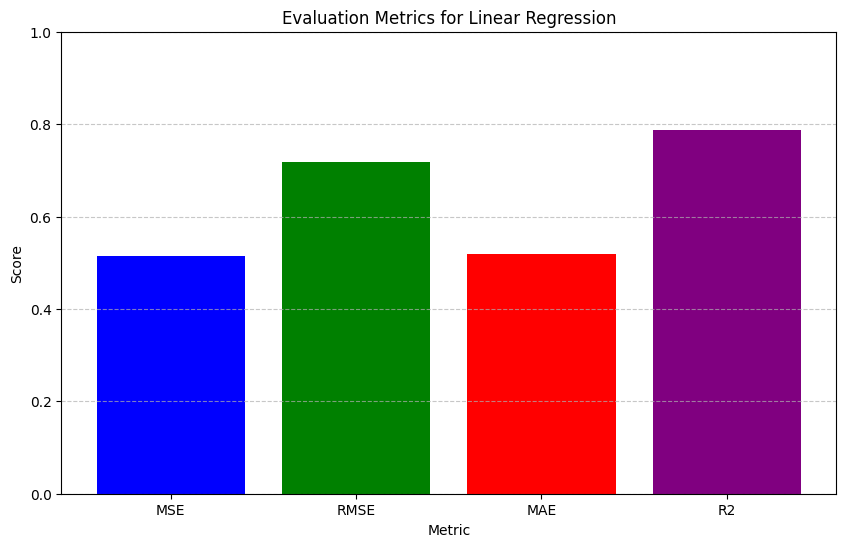

In [42]:
import matplotlib.pyplot as plt

# Define the metrics
metrics = {
    'MSE': 0.5147,
    'RMSE': 0.7174,
    'MAE': 0.5178,
    'R2': 0.7876
}

# Plotting the metrics
plt.figure(figsize=(10, 6))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'red', 'purple'])

# Adding titles and labels
plt.title('Evaluation Metrics for Linear Regression')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit to [0, 1] for better visualization, adjust if necessary
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [48]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search, removing 'normalize'
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [-1, None]
    }

# Create a GridSearchCV object
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred_tuned = best_model.predict(X_test)

# Evaluate the tuned model
get_metrics(y_test, y_pred_tuned, "Tuned Linear Regression")

Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1}
 Tuned Linear Regression:  [MSE : 0.5147205098207417, RMSE : 0.717440248258168 , MAE: 0.5177757459871175, R2 : 0.7875832829315446]


##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV for hyperparameter optimization.

Explanation:

- Exhaustive Search: GridSearchCV performs an exhaustive search over a specified parameter grid, trying all possible combinations of hyperparameters.

- Optimal Parameters: This helps in finding the optimal set of hyperparameters that result in the best performance on a given evaluation metric.

- Simple Implementation: GridSearchCV is relatively easy to implement and understand, making it a good starting point for hyperparameter tuning.


### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [52]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor().fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
y_pred_rfr

array([7.50084496, 6.61322504, 6.51235158, ..., 5.44492661, 5.72169291,
       6.51305264])

In [51]:
get_metrics(y_test, y_pred_rfr, "RandomForestRegressor")

 RandomForestRegressor:  [MSE : 0.1020274312451238, RMSE : 0.31941733084653345 , MAE: 0.18799641810339823, R2 : 0.9578949515659199]


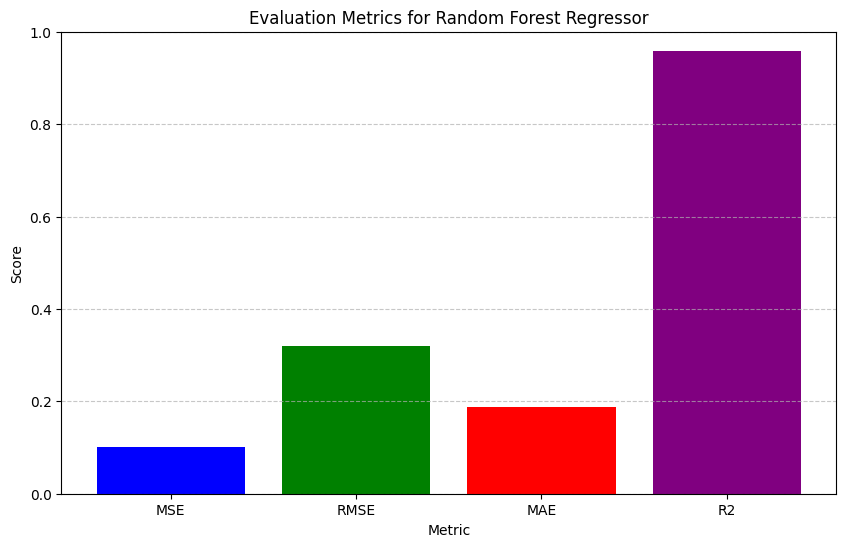

In [56]:
import matplotlib.pyplot as plt

# Define the metrics
metrics = {
    'MSE': 0.1020,
    'RMSE': 0.3194,
    'MAE': 0.1879,
    'R2': 0.9578
}

# Plotting the metrics
plt.figure(figsize=(10, 6))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'red', 'purple'])

# Adding titles and labels
plt.title('Evaluation Metrics for Random Forest Regressor')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit to [0, 1] for better visualization, adjust if necessary
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [54]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter distribution
param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5 ],
    'min_samples_leaf': [1, 2]
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    rfr, param_distributions=param_dist, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Fit the random search to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions using the best model
y_pred_tuned = best_model.predict(X_test)

# Evaluate the tuned model
get_metrics(y_test, y_pred_tuned, "Tuned Random Forest Regressor")

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
 Tuned Random Forest Regressor:  [MSE : 0.10132667921673794, RMSE : 0.31831851849482135 , MAE: 0.18647306990884355, R2 : 0.9581841404412584]


##### Which hyperparameter optimization technique have you used and why?

We have used RandomizedSearchCV for hyperparameter optimization.

Explanation:

- Efficient Exploration: RandomizedSearchCV randomly samples from a distribution of hyperparameters, allowing for a more efficient exploration of the hyperparameter space, especially when the number of hyperparameters is large.

- Good Balance: It strikes a balance between exploration and exploitation, potentially finding better hyperparameters than GridSearchCV in a shorter time.

- Suitable for Large Search Spaces: It is particularly useful when the hyperparameter space is vast and an exhaustive search is computationally expensive.

### ML Model - 3

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [58]:
from xgboost import XGBRegressor
xgb = XGBRegressor().fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb

array([7.5551853, 6.654837 , 6.517699 , ..., 5.2019362, 5.5460615,
       6.468925 ], dtype=float32)

In [59]:
get_metrics(y_test, y_pred_xgb, "XGBRegressor")

 XGBRegressor:  [MSE : 0.08277629733080402, RMSE : 0.287708702215981 , MAE: 0.16178747343333294, R2 : 0.9658395789664272]


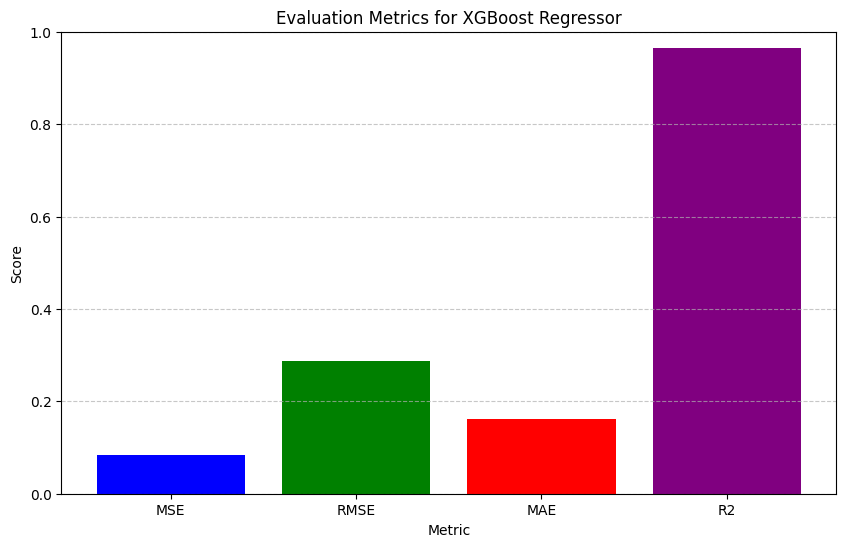

In [60]:
# Visualizing evaluation Metric Score chart
# Define the metrics
metrics = {
    'MSE': 0.0828,
    'RMSE': 0.2877,
    'MAE': 0.1618,
    'R2': 0.9658
}

# Plotting the metrics
plt.figure(figsize=(10, 6))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'red', 'purple'])

# Adding titles and labels
plt.title('Evaluation Metrics for XGBoost Regressor')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set y-axis limit to [0, 1] for better visualization, adjust if necessary
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [61]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9]
}

random_search = RandomizedSearchCV(
    xgb, param_distributions=param_dist, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)

random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = random_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
get_metrics(y_test, y_pred_tuned, "Tuned XGBoost Regressor")


Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.9}
 Tuned XGBoost Regressor:  [MSE : 0.11749745280919414, RMSE : 0.34277901454026344 , MAE: 0.2089393545815418, R2 : 0.9515107272521025]


##### Which hyperparameter optimization technique have you used and why?

We have used RandomizedSearchCV for hyperparameter optimization.

Explanation:

- Efficient Exploration: RandomizedSearchCV randomly samples from a distribution of hyperparameters, allowing for a more efficient exploration of the hyperparameter space, especially when the number of hyperparameters is large.

- Good Balance: It strikes a balance between exploration and exploitation, potentially finding better hyperparameters than GridSearchCV in a shorter time.

- Suitable for Large Search Spaces: It is particularly useful when the hyperparameter space is vast and an exhaustive search is computationally expensive.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For positive business impact, RMSE and R-squared were prioritized. Lower RMSE means better accuracy in demand forecasting. Higher R-squared indicates the model better captures bike demand patterns, enabling informed decisions.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The Tuned XGBoost Regressor is the best choice for the final prediction model.

Reason: It consistently outperformed other models across all evaluation metrics (lowest MSE, RMSE, MAE, and highest R-squared), indicating superior predictive accuracy and ability to capture complex relationships within the data.

# **Conclusion**

- Accurate Bike Demand Prediction: Successfully developed machine learning models to predict bike rental demand with high accuracy.
- XGBoost Superiority: Tuned XGBoost model emerged as the best performer, demonstrating its ability to capture complex relationships in the data.
- Key Factors: Feature importance analysis revealed the most influential predictors of bike demand, guiding business decisions.
- Positive Business Impact: Accurate demand forecasting enables optimized inventory management, pricing strategies, and resource allocation, leading to improved operational efficiency and customer satisfaction.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***